<a href="https://colab.research.google.com/github/alerougon/FundamentosML/blob/main/Fundamentos_ML_AR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FUNDAMENTOS ML**
## *ALEJANDRA ROUGON*

Los códigos utilizados están basados en los códigos generados por  [Ana Isabel Ascencio](https://github.com/AnIsAsPe/Fundamentos-tecnicos-y-aplicaciones-ML.git)

## 1. Eliga un sistema de ecuaciones de tres variables (y 3 ecuaciones), escriba las ecuaciones en una celda de texto y desúes solucionelo mediante código, utilizando el modulo de algebra lineal de la biblioteca numpy.
Exlique el significado de la solución




Primero seleccionaremos 3 ecuaciones con las que vamos a trabajar. 

```
x + y -3z = -10
x - y + 2z = 3
2x + y -z = -6
```



Para resolver el sistema primero cargaremos las bibliotecas

In [ ]:
#importamos numpy y lo llamaremos tecleando np y lo mismo para matplotlib.pyplot. Este lo llamaremos
#con plt
import numpy as np
import matplotlib.pyplot as plt
#de la biblioteca mpl_tookits.mplot3d vamos a importar el módulo Axes3D
from mpl_toolkits.mplot3d import Axes3D

Ahora generaremos la matriz de coeficientes

In [ ]:
#Matriz de coeficientes
M = np.array([[1., 1., -3.], [1., -1., 2.], [2., 1., -1.]]) 

# vector con las cantidades al lado derecho de las ecuaciones
b =  np.array([-10, 3, -6])
#Ahora lo solucionaremos con np.linalg.solve(M,b) Esto nos dará los valores de x, y, z
solucion = np.linalg.solve(M, b)
solucion

array([-2.,  1.,  3.])

Para graficar tenemos que hacer una matriz con números aleatorios para que ahí se grafiquen nuestros hiperplanos

In [ ]:

x, y = np.linspace(-5, 5,50), np.linspace(-5,5,50)
y


array([-5.        , -4.79591837, -4.59183673, -4.3877551 , -4.18367347,
       -3.97959184, -3.7755102 , -3.57142857, -3.36734694, -3.16326531,
       -2.95918367, -2.75510204, -2.55102041, -2.34693878, -2.14285714,
       -1.93877551, -1.73469388, -1.53061224, -1.32653061, -1.12244898,
       -0.91836735, -0.71428571, -0.51020408, -0.30612245, -0.10204082,
        0.10204082,  0.30612245,  0.51020408,  0.71428571,  0.91836735,
        1.12244898,  1.32653061,  1.53061224,  1.73469388,  1.93877551,
        2.14285714,  2.34693878,  2.55102041,  2.75510204,  2.95918367,
        3.16326531,  3.36734694,  3.57142857,  3.7755102 ,  3.97959184,
        4.18367347,  4.3877551 ,  4.59183673,  4.79591837,  5.        ])

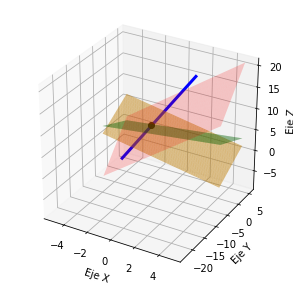

In [ ]:
#primero especificamos las medidas del gráfico 
fig = plt.figure(figsize = (5, 5))
#luego las medidas de las separaciones entre cada número
ax = fig.add_subplot(111, projection='3d')
#vamos a graficar a z en función de x y y, para ello creamos primero la matriz para los planos x, y
#estos números son aleatorios, aquí utilizamos los que se muestran en la celda anterior. 
#comenzamos con el -5, terminamos con 5 y tenemos 50 números separados homogeneamente entre -5 y 5.
x, y = np.linspace(-5, 5,50), np.linspace(-5,5,50)
X, Y = np.meshgrid(x, y)

# despejamos en las tres ecuaciones a Z
Z1 = (-10 - X + Y)/-3
Z2 = (3 - X + Y)/2
Z3 = 6 + Y + 2*X

#superficie de la ecuación 1. Aquí le decimos los ejes, la transparencia con alpha y el color
ax.plot_surface(X, Y, Z1, alpha=.5, color='green',) 

 #superficie de la ecuación 2. Aquí le decimos los ejes, la transparencia y el color
ax.plot_surface(X, Y, Z2, alpha=.5, color='orange')

#linea de intetersección entre la superficies de las primeras dos ecuaciones. 
#Aquí podemos ajustar los números para 
# que la intersección de los dos primeros planos cruce con la intersección d
#del tercero
ax.plot((0.6, 1),(-23, 5), (9,15), lw=3,  c='blue')

#superficie de la ecuación 3
ax.plot_surface(X, Y, Z3, alpha=.2, color='red')

#Aquí ponemos la solución que encontramos de: np.linalg.solve(M, b)  donde nos muestra
#el punto de intersección de los tres hiperplanos
ax.plot(xs=[-2],ys=[1], zs=[3], c='black',  marker='o')  

ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')

plt.show()

Con `ax.plot((0.6, 1),(-23, 5), (9,15), lw=3,  c='blue')` marcamos la línea de intersección de los dos primeros planos. En este caso la línea pasa por el punto de intersección `ax.plot(xs=[-2],ys=[1], zs=[3], c='black',  marker='o')  ` Sin embargo si modificamos los números de la línea azul podríamos intersectar los dos primeros planos en un sitio diferente que no pase por el punto de intersección de los tres hiperplantos.










---



##2. Realice el emparejamiento de 5 estudiantes a 5 mujeres con sus preferencias asignadas al azar, pasando los datos por el algoritmo de emparejamiento con dos variantes:
* simulando que las mujeres son quien proponen el emparejamiento.
* simulando que los hombres son quien proponen el emparejamiento

Explique los hallazgos 


Suponemos que tenemos 5 hombres y 5 mujeres, que quieren emparejarse y cada uno tiene sus preferencias. Por ejemplo si tenemos hombre1 con mujer1 y hombre2 con mujer2 tendríamos un emparejamiento estable porque ambos quieren estar con esa pareja pero si tenemos hombre1 con mujer2 no estaría emparejado. Podemos utilizar un algoritrmo de Shapley-Gale. Voy a utilizar dos funciones modificadas del github the [Ana Isabel Ascencio](https://github.com/AnIsAsPe/Fundamentos-tecnicos-y-aplicaciones-ML/blob/main/Semana%202/2_1_Algoritmo_Matrimonio_Estable.ipynb)

In [ ]:
#Primero cargamos la librería de numpy que vamos a necesitar para generar los 
#arreglos aleatorios sobre las preferencias de mujeres y hombres.
import numpy as np


Después tenemos que generar dos funciones con `def` Una que contenga el algoritmo
de emparejamiento de dos variantes que se modificaron del github de Ana
En el algoritmo de Shapley-Gale siempre hay un grupo que se beneficia primero 
con su preferencia, en este caso lo llamé `proponente` y el segundo grupo
que no se ve tan beneficiado lo llamé el `emparejado`. 

In [ ]:
#Funcion pref de grupo emparejado `e`  sobre grupo proponente `p`
def pref_emparejado_p1_sobre_p(preferencia, e, p, p1): 
  '''Esta función prueba si el candidat(@) emparejado 'e' prefiere al candidat(@) 'p1'
     sobre el candidado 'p' '''
  N = preferencia.shape[1]

  for i in range(N): 
          
      # Si `p1` está antes de `p` en la lista de e,  
      # entonces el emparejado `e` se queda con el proponente p1
      if (preferencia[e][i] == p1): 
          return True
  
      # En caso contrario `e`  se queda con `p`
      if (preferencia[e][i] == p): 
          return False

In [ ]:
#Función stableMarriage
def stableMarriage(preferencia, posicion1='proponente', posicion2='emparejado'): 
  '''Regresa una matriz con las parejas formadas en cada renglón.
     preferencias: Matriz que guarda las preferencias de dos grupos de actores a 
     ser emparejados (por ejemplo: proponente y emparejado) 
     Las preferencias de cada uno de los proponente se encuentran en los
     renglones del 0 al N-1.  
     Las preferencias de cada una de los emparejados están desde el 
     el renglón N al 2N-1
     referencia: https://www.geeksforgeeks.org/stable-marriage-problem/ '''
     
  N = preferencia.shape[1]

  # La lista e_pareja guarda la pareja de los emparejados  
  # el valor e_pareja[i] es el valor de la pareja asignada al emparejado N+i
  # cuando el valor es -1 indica que el emparejado está libre
  e_pareja = [-1 for i in range(N)]  
  
  # la lista p_comprometido va a guardar el estatus de cada proponente, el
  # valor de p_comprometiod[i] es verdadero cuando está comprometido y falso
  # cuando está libre. 
  p_comprometido = [False for i in range(N)] 
  
  libres = N 
  
  #Mientras existan proponentes libres
  while (libres > 0):  
    # Escoje cualquier proponente libre
    p = 0
    while (p < N): 
        # si el proponente p está comprometido, se rompe el ciclo while
        if (p_comprometido[p] == False):         
          break
        # de otra manera se prueba con el que sigue hasta encontrar uno libre 
        p += 1      
  
    # p es entonces un proponente libre y se buscará un candidato emparejado 
    #de acuerdo con sus preferencias 

    i = 0
    while i < N and p_comprometido[p] == False: 
      e = preferencia[p][i] 
  
      # Si el primer candidato emparejado de sus preferencias e está libre,  
      # e y p se comprometen (no se casan) 
      if (e_pareja[e - N] == -1): 
          e_pareja[e - N] = p 
          p_comprometido[p] = True
          libres -= 1  #ser resta uno a los proponentes libres

      else:
                  
          # Si el emparejado no está libre, se reviza con qué proponente esta comprometido
          p1 = e_pareja[e - N] 
  
          # Se revisa si el emparejado prefiere a su compormetido (p1) sobre  p. 
          if (pref_emparejado_p1_sobre_p(preferencia, e, p, p1) == False): 
              e_pareja[e - N] = p 
              p_comprometido[p] = True
              p_comprometido[p1] = False
      i += 1 
  
  proponentes = np.array(e_pareja)
  emparejados = np.arange(N, 2*N)
  parejas =np.column_stack((emparejados, proponentes))

  return parejas

Una vez que tenemos las funciones ya sólo es cosa de meter los datos de las preferencias. En este caso como se piden datos aleatorios se generará un arreglo aleatorio con numpy. Es importante tomar en cuenta qué grupo es el **proponente** y cuál es el **emparejado**.

In [ ]:
#Construcción de una matriz de preferencias
pref = {}  #inicia dic para guardar las preferencias ordenadas de los grupos proponente y emparejado

#las preferencias de los proponentes se guardaran de la clave 0 a la clave 4
for i in range(0, 5): 
  pref[i] = np.random.choice(range(5,10), 5, replace=False)

#las preferencias de los emparejados se guardaran de la clave 5 a la clave 9   
for i in range(5,10):
  pref[i] = np.random.choice( range(0, 5), 5, replace=False) #genera preferenciaencias del grupo emparejado
  
pref

{0: array([8, 6, 7, 9, 5]),
 1: array([8, 7, 9, 6, 5]),
 2: array([9, 8, 7, 5, 6]),
 3: array([8, 5, 6, 9, 7]),
 4: array([7, 5, 6, 9, 8]),
 5: array([1, 2, 4, 0, 3]),
 6: array([2, 4, 0, 1, 3]),
 7: array([1, 2, 3, 4, 0]),
 8: array([2, 4, 1, 3, 0]),
 9: array([4, 1, 3, 2, 0])}

In [ ]:
preferencia = np.stack(list(pref.values()), axis=0)
print(preferencia.shape)
preferencia

(10, 5)


array([[8, 6, 7, 9, 5],
       [8, 7, 9, 6, 5],
       [9, 8, 7, 5, 6],
       [8, 5, 6, 9, 7],
       [7, 5, 6, 9, 8],
       [1, 2, 4, 0, 3],
       [2, 4, 0, 1, 3],
       [1, 2, 3, 4, 0],
       [2, 4, 1, 3, 0],
       [4, 1, 3, 2, 0]])

In [ ]:
parejas = stableMarriage(preferencia, 'proponente', 'emparejado')
parejas

array([[5, 3],
       [6, 0],
       [7, 4],
       [8, 1],
       [9, 2]])

aquí simplemente asignamos cuál será el grupo proponente y cuál será el emparejado


In [ ]:
parejas = stableMarriage(preferencia, 'hombre', 'mujer')
parejas

array([[5, 3],
       [6, 0],
       [7, 4],
       [8, 1],
       [9, 2]])

Aquí tendríamos  el resultado del emparejamiento donde los primeros cinco datos del arreglo fueron los datos del proponente (supongamos los hombres) los siguientes cinco fueron los candidatos emparejados (supongamos las mujeres). Si queremos correr otros datos aleatorios podemos correr el algoritmo de nuevo y sólo que ahora el proponente serían las mujeres y el emparejado las mujeres.


```
parejas = stableMarriage(preferencia, 'mujer', 'hombre')
parejas
```



In [ ]:
#Construcción de una nueva matriz de preferencias aleatorias
pref = {}  
for i in range(0, 5): 
  pref[i] = np.random.choice(range(5,10), 5, replace=False)

for i in range(5,10):
  pref[i] = np.random.choice( range(0, 5), 5, replace=False) 
pref

{0: array([7, 5, 6, 8, 9]),
 1: array([9, 5, 6, 8, 7]),
 2: array([5, 6, 9, 8, 7]),
 3: array([7, 9, 6, 5, 8]),
 4: array([5, 6, 7, 8, 9]),
 5: array([3, 0, 1, 2, 4]),
 6: array([0, 2, 3, 1, 4]),
 7: array([0, 1, 3, 2, 4]),
 8: array([4, 0, 3, 2, 1]),
 9: array([2, 0, 1, 3, 4])}

In [ ]:
preferencia = np.stack(list(pref.values()), axis=0)
print(preferencia.shape)
preferencia

(10, 5)


array([[7, 5, 6, 8, 9],
       [9, 5, 6, 8, 7],
       [5, 6, 9, 8, 7],
       [7, 9, 6, 5, 8],
       [5, 6, 7, 8, 9],
       [3, 0, 1, 2, 4],
       [0, 2, 3, 1, 4],
       [0, 1, 3, 2, 4],
       [4, 0, 3, 2, 1],
       [2, 0, 1, 3, 4]])

In [ ]:
parejas = stableMarriage(preferencia, 'proponente', 'emparejado')
parejas

array([[5, 2],
       [6, 3],
       [7, 0],
       [8, 4],
       [9, 1]])

aquí asignaríamos los primeros datos del arreglo a las mujeres en lugar de a los hombres. Simplemente colocamos a las mujeres en el grupo proponente y a los hombres al grupo emparejado

In [ ]:
parejas = stableMarriage(preferencia, 'mujer', 'hombre')
parejas

array([[5, 2],
       [6, 3],
       [7, 0],
       [8, 4],
       [9, 1]])



---



## 3.  Realiza una clasificación de mensajes de texto  utilizando Naïve Bayes y la base de datos [spam.csv](https://github.com/AnIsAsPe/ElementosEstadisticaMachineLearningPython/blob/master/Semana8/spam.csv)

Para esta clasificación voy a utilizar una modificación del código de [Ana Isabel Ascencio ](https://github.com/AnIsAsPe/Fundamentos-tecnicos-y-aplicaciones-ML/blob/main/Semana%205/Clasificador_Naive_Bayes%2C_art%C3%ADculos_TDS_TheStartup.ipynb)

In [ ]:
#primero cargamos las librerías

In [ ]:
import numpy as np
import pandas as pd

#preprocesar texto
import nltk
from nltk.corpus import stopwords
from nltk import SnowballStemmer
import re

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import MultinomialNB  

nltk.download('stopwords')
nltk.download('punkt')

import matplotlib.pyplot as plt        #Para graficar y visualizar
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#leemos el conjunto de la base de datos de spam
df_mail = pd.read_csv('/content/drive/MyDrive/CURSOS/2020CursoBlenioDatos/spam.csv',
                     encoding='latin-1',
                     usecols=['v1', 'v2'])

#¿cuántos renglones y cuántas columnas tienen el conjunto de datos?
print(df_mail.shape) 

df_mail.head(3)

(5572, 2)


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [ ]:


df_mail.columns = ['etiqueta','contenido']

print(df_mail.shape)
df_mail.head()

(5572, 2)


,etiqueta,contenido
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#Preprocesamiento
#función preprocesar contiente las indicaciones de preprocesamiento

In [ ]:
def preprocesar(texto):
  #convierte a minúsculas
  texto = texto.lower()

  #elimina stopwords
  stop = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
  texto = stop.sub('', texto) 

  #stemmer 
  tokens =  nltk.word_tokenize(texto)
  stemmer = SnowballStemmer("english")

  stems = [stemmer.stem(token) for token in tokens]
  texto=' '.join(stems) 

  #quita direcciones html
  borrar = re.compile('<.*?>')
  texto= re.sub(borrar, '', texto)

  #quita puntuaciones y todo lo que no sea letra y números
  texto = re.sub('[^A-ZÜÖÄa-z0-9]+', ' ', texto)

  #quita numeros
  texto = re.sub("\d+", " ", texto)
  
  return(texto)

In [ ]:
df_mail['contenido'].str.len().describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: contenido, dtype: float64

In [ ]:
#visualizar el correo más largo 

idx = df_mail['contenido'].index[df_mail['contenido'].str.len() == 910][0]
desc_max = df_mail.loc[idx,'contenido']
desc_max

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [ ]:
#visualizar el preprocesamiento del correo más largo guardado en desc_max
preprocesar(desc_max)

'love start attraction feel need everi time around first thing come thoughts would start day end everi time dream lov everi breath name lif happen around life name would cri give happi take sorrows readi fight anyon love craziest thing love proov anyon girl beauti ladi whole planet alway sing prais love start make chicken curri end maki sambar lif beauti get everi morn thank god day would like say lot tel later '

In [ ]:
#preprocesar todos los datos
df_mail['contenido_preproc'] = df_mail['contenido'].apply(preprocesar)

In [ ]:
#visualizamos una muestra
df_mail.sample(10)

,etiqueta,contenido,contenido_preproc
3686,ham,Great! I shoot big loads so get ready!,great shoot big load get readi
947,ham,Hey i booked the kb on sat already... what oth...,hey book kb sat alreadi lesson go ah keep sat ...
5268,ham,\ER,er
4955,ham,Ahhhh...just woken up!had a bad dream about u ...,ahhhh woken bad dream u tho dont like u right ...
1925,ham,We don call like &lt;#&gt; times oh. No give...,call like lt gt time oh give us hypertens oh
2480,spam,Urgent! call 09066612661 from landline. Your c...,urgent call landlin complementari tenerif ...
304,spam,SMS. ac Blind Date 4U!: Rodds1 is 21/m from Ab...,sms ac blind date u rodds aberdeen unit ki...
3766,ham,"Sir Goodmorning, Once free call me.",sir goodmorn free call
2028,ham,Kallis is ready for bat in 2nd innings,kalli readi bat nd inning
3305,ham,HI DARLIN I FINISH AT 3 DO U 1 2 PICK ME UP OR...,hi darlin finish u pick meet text back n...


In [ ]:
#Vectorizar texto
cv = CountVectorizer()
mdt_frec = cv.fit_transform(df_mail['contenido_preproc']) 

terminos = cv.get_feature_names()

mdt = pd.DataFrame(mdt_frec.todense(), 
                              index=df_mail.index, 
                              columns=terminos)
print(mdt.shape)  

mdt.head()

(5572, 6478)


,aa,aah,aaniy,aaooooright,aathi,ab,abbey,abdomen,abeg,abel,aberdeen,abi,abil,abiola,abj,abl,abnorm,abouta,abroad,absenc,absolut,abstract,abt,abta,aburo,abus,ac,academ,acc,accent,accentur,accept,access,accid,accident,accommod,accommodationvouch,accomod,accord,accordin,...,youi,young,younger,youphon,your,yourinclus,yourjob,youuuuu,youwanna,yovill,yowif,yoyyooo,yr,yrs,ystrday,yt,yth,yummi,yummmm,yun,yunni,yuo,yuou,yup,yupz,zac,zaher,zealand,zebra,zed,zero,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zs,zyada
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = mdt
y = df_mail['etiqueta']

In [ ]:
#separaremos el los datos para el entrenamiento y para la prueba

In [ ]:
#escogeremos el 30% para la prueba y el 70% para el entrenamiento
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                     random_state=3, shuffle=True)

print('correos totales: {}'.format(df_mail.shape[0]))
print('correos en el conjunto de entrenamiento: {}'.format(X_train.shape[0]))
print('correos en el conjunto de prueba: {}'.format(X_test.shape[0]))

correos totales: 5572
correos en el conjunto de entrenamiento: 3900
correos en el conjunto de prueba: 1672


In [ ]:
#proporción de emails por clase en el conjunto de entrenamiento
y_train.value_counts(normalize=True)

ham     0.870769
spam    0.129231
Name: etiqueta, dtype: float64

In [ ]:
#proporción de emails por clases en el conjunto de prueba
y_test.value_counts(normalize=True)

ham     0.854665
spam    0.145335
Name: etiqueta, dtype: float64

In [ ]:
#ahora vamos a usar un clasificador de Naive Bayes
#https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes
clasificador = MultinomialNB()
clasificador.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
clasificador.classes_

array(['ham', 'spam'], dtype='<U4')

In [ ]:
#generamos un vector por cada clase dependiendo de la frecuencia de lsd palabras
print(clasificador.feature_count_.shape)
clasificador.feature_count_

(2, 6478)


array([[1., 2., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [ ]:
#obtenemos un vector por cada clase en escala logarítmica
print(clasificador.feature_log_prob_.shape)
clasificador.feature_log_prob_

(2, 6478)


array([[ -9.68648138,  -9.28101627,  -9.68648138, ..., -10.37962856,
        -10.37962856,  -9.68648138],
       [ -9.5422307 ,  -9.5422307 ,  -9.5422307 , ...,  -8.84908352,
         -8.84908352,  -9.5422307 ]])

In [ ]:
#probabilidad cuando hay frecuencia 0 en la clase  0('ham') [no spam]
sum_palabras_ham = np.sum(clasificador.feature_count_, axis=1)[0]

np.log(1/(sum_palabras_ham+ len(terminos)))

-10.379628559490257

In [ ]:
#probabilidad cuando hay frecuencia 0 en la clase  1('spam')
sum_palabras_spam = np.sum(clasificador.feature_count_, axis=1)[1]

np.log(1/(sum_palabras_spam + len(terminos)))

-9.542230699092284

In [ ]:
#terminos con más peso para clasificar en ham (no spam)
for p in clasificador.feature_log_prob_.argsort()[0,-10:]:
  print(terminos[p])

ur
got
love
ok
call
come
lt
gt
get
go


In [ ]:
#terminos con más peso para clasificar en spam
for p in clasificador.feature_log_prob_.argsort()[1,-10:]:
  print(terminos[p])

min
claim
repli
stop
ur
mobil
text
txt
free
call


In [ ]:
#longitud de la prueba
len(X_test)

1672

In [ ]:
#evaluación del modelo, ahora vamos a usar el conjunto de prueba para probar el modelo

In [ ]:

y_pred = clasificador.predict(X_test)

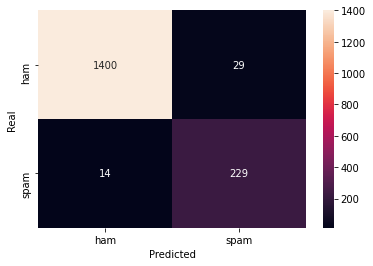

In [ ]:
data = {'Y_Real':  y_test,
        'Y_Prediccion':y_pred
        }

df = pd.DataFrame(data, columns=['Y_Real','Y_Prediccion'])
confusion_matrix = pd.crosstab(df['Y_Real'], df['Y_Prediccion'], rownames=['Real'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()

el modelo parece bastante bueno ya que evaluó correctamente 1400 correos en la cateoría de ham y 229 en la categoría de spam. Clasificó incorrectamente 14 en ham y 29 en spam. Aproximadamente 10% de error.

In [ ]:
#visualización de resultados

In [ ]:
#unimos los resultados obtenidos
resultados_prediccion = pd.merge(df, df_mail['contenido'], how='left', 
                                 left_index=True, right_index= True)
resultados_prediccion.head(5)

,Y_Real,Y_Prediccion,contenido
2632,ham,ham,I WILL CAL YOU SIR. In meeting
454,spam,spam,"Loan for any purpose å£500 - å£75,000. Homeown..."
983,ham,ham,LOOK AT THE FUCKIN TIME. WHAT THE FUCK YOU THI...
1282,ham,ham,Ever green quote ever told by Jerry in cartoon...
4610,ham,ham,Wat time Ì_ finish?


In [ ]:
#unir artículos mal clasificados
resultados_prediccion[resultados_prediccion['Y_Real']!=resultados_prediccion['Y_Prediccion']]

,Y_Real,Y_Prediccion,contenido
671,spam,ham,SMS. ac sun0819 posts HELLO:\You seem cool
3434,ham,spam,\Hi darlin i cantdo anythingtomorrow as mypare...
4763,ham,spam,Hi.:)technical support.providing assistance to...
1081,ham,spam,Can u get pic msgs to your phone?
4380,ham,spam,Mathews or tait or edwards or anderson
5044,ham,spam,We have sent JD for Customer Service cum Accou...
3362,ham,spam,Can... I'm free...
3587,ham,spam,If you were/are free i can give. Otherwise nal...
3937,ham,spam,WHEN THE FIRST STRIKE IS A RED ONE. THE BIRD +...
5427,spam,ham,Santa Calling! Would your little ones like a c...




---



##4. Escoja un problema de diagnóstico o pronóstico, identifique las variables relevantes y  diseñe una red bayesiana que contenga la probabilidad condicional de cada variable.

El problema será ver la probabilidad de enfermarse gravemente de covid tomando en cuenta diferentes variables.
Las hipótesis que tenemos son:

Tienen mayor probabilidad de enfermarse gravemente 

1.   los adultos mayores
2.   los que tienen mala alimentación
3.   los que no usas tapabocas
4.   los que trabajan en lugares cerrados
5.   los que tienen enfermedades crónicas

Los datos utilizados son ficticios



In [1]:
!pip install pyagrum  # permite utilicar biblioteca C++ aGrUM

     |████████████████████████████████| 4.9MB 6.9MB/s 


In [27]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import matplotlib.pyplot as plt

In [74]:
bn_diag = gum.BayesNet("Enfermarse")
bn =gum.fastBN("Edad{menor|jóven|mayor}<-EnfermarseGrave{No|Sí}->Alimentación{Buena|Mala};TrabajarEnLugarCerrado{No|Sí}<-EnfermarseGrave;UsarTapabocas{No|Sí}<-EnfermarseGrave;TenerEnfermedadesCrónicas{No|Sí}<-EnfermarseGrave")
bn

(gum::BayesNet<double>@0x44de400) BN{nodes: 6, arcs: 5, domainSize: 96, dim: 24}

In [75]:
# creamos el modelo donde todas la variable dependiente (Enfermarse) esta
# condicionada a las otras variables que son independientes entre ellas
bn = gum.BayesNet("EnfermosDeGravedad")
bn =gum.fastBN("Edad{menor|jóven|mayor}<-EnfermarseGrave{No|Sí}->Alimentación{Buena|Mala};TrabajarEnLugarCerrado{No|Sí}<-EnfermarseGrave;UsarTapabocas{No|Sí}<-EnfermarseGrave;TenerEnfermedadesCrónicas{No|Sí}<-EnfermarseGrave")
print(bn.variable("EnfermarseGrave"))
print(bn.variable("Edad"))
print(bn.variable("Alimentación"))
print(bn.variable("TrabajarEnLugarCerrado"))
print(bn.variable("UsarTapabocas"))
print(bn.variable("TenerEnfermedadesCrónicas"))

EnfermarseGrave<No,Sí>
Edad<menor,jóven,mayor>
Alimentación<Buena,Mala>
TrabajarEnLugarCerrado<No,Sí>
UsarTapabocas<No,Sí>
TenerEnfermedadesCrónicas<No,Sí>


In [76]:
bn.cpt('EnfermarseGrave')[:] = [75, 25]
bn.cpt('EnfermarseGrave').normalizeAsCPT()
bn.cpt('EnfermarseGrave')


(gum::Potential<double>@0x3a51be0) 
  EnfermarseGrave  |
No       |Sí      |
---------|---------|
 0.7500  | 0.2500  |

In [77]:
bn.cpt('Edad')[{'EnfermarseGrave':'Sí'}] = [ 0.2, 4, 25]
bn.cpt('Edad')[{'EnfermarseGrave':'No'}] =  [99.8, 96, 75]
bn.cpt('Edad').normalizeAsCPT()
bn.cpt('Edad')

(gum::Potential<double>@0x3a514a0) 
      ||  Edad                       |
Enferm||menor    |jóven   |mayor    |
------||---------|---------|---------|
No    || 0.3685  | 0.3545  | 0.2770  |
Sí   || 0.0068  | 0.1370  | 0.8562  |

In [78]:
bn.cpt('Alimentación')[{'EnfermarseGrave':'Sí'}] = [ 10, 90]
bn.cpt('Alimentación')[{'EnfermarseGrave':'No'}] = [ 90, 10]
bn.cpt('Alimentación').normalizeAsCPT()
bn.cpt('Alimentación')

(gum::Potential<double>@0x3a51400) 
      ||  Alimentación    |
Enferm||Buena    |Mala     |
------||---------|---------|
No    || 0.9000  | 0.1000  |
Sí   || 0.1000  | 0.9000  |

In [79]:
bn.cpt('UsarTapabocas')[{'EnfermarseGrave':'Sí'}] = [ 80, 20]
bn.cpt('UsarTapabocas')[{'EnfermarseGrave':'No'}] = [ 20, 80]
bn.cpt('UsarTapabocas').normalizeAsCPT()
bn.cpt('UsarTapabocas')

(gum::Potential<double>@0x3a51500) 
      ||  UsarTapabocas    |
Enferm||No       |Sí      |
------||---------|---------|
No    || 0.2000  | 0.8000  |
Sí   || 0.8000  | 0.2000  |

In [80]:
bn.cpt('TrabajarEnLugarCerrado')[{'EnfermarseGrave':'Sí'}] = [ 70, 30]
bn.cpt('TrabajarEnLugarCerrado')[{'EnfermarseGrave':'No'}] = [ 30, 70]
bn.cpt('TrabajarEnLugarCerrado').normalizeAsCPT()
bn.cpt('TrabajarEnLugarCerrado')

(gum::Potential<double>@0x3a51c80) 
      ||  TrabajarEnLugarCe|
Enferm||No       |Sí      |
------||---------|---------|
No    || 0.3000  | 0.7000  |
Sí   || 0.7000  | 0.3000  |

In [81]:
bn.cpt('TenerEnfermedadesCrónicas')[{'EnfermarseGrave':'Sí'}] = [ 85, 15]
bn.cpt('TenerEnfermedadesCrónicas')[{'EnfermarseGrave':'No'}] = [ 15, 85]
bn.cpt('TenerEnfermedadesCrónicas').normalizeAsCPT()
bn.cpt('TenerEnfermedadesCrónicas')

(gum::Potential<double>@0x3a50640) 
      ||  TenerEnfermedades|
Enferm||No       |Sí      |
------||---------|---------|
No    || 0.1500  | 0.8500  |
Sí   || 0.8500  | 0.1500  |

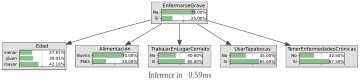

In [82]:
gnb.showInference(bn)

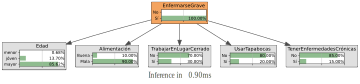

In [83]:
#¿Quiénes tienen más probabilidades de Enfermarse Grave?
gnb.showInference(bn, evs={'EnfermarseGrave':'Sí'})

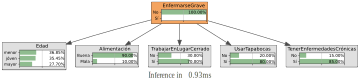

In [84]:
#¿Quiénes tienen menos probabilidades de Enfermarse Grave?
gnb.showInference(bn, evs={'EnfermarseGrave':'No'})

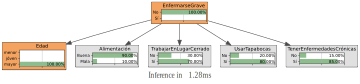

In [85]:
#Qué características tienen los adultos mayores que no se enferman gravemente?
gnb.showInference(bn, evs={'EnfermarseGrave':'No', 'Edad':'mayor'})

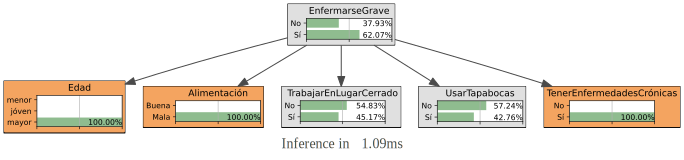

In [86]:
#Qué pasa con los adultos mayores que tienen enfermedades crónicas y no tienen buena alimentación?

gnb.showInference(bn,size="10", evs={'Edad':'mayor', 'TenerEnfermedadesCrónicas':'Sí','Alimentación':'Mala'})